In [12]:
%pylab inline
from scipy.special import erf 

Populating the interactive namespace from numpy and matplotlib


In [15]:
#Define parameters
Fo = 0.5
#Create grid
nt = 100
nx = 100
T = zeros([nt, nx])
#Set initial condition
T_init = 1.
T_ocean = 0.
T[0,:] = T_init
#Set boundary conditions
T[:,0] = T_ocean 
T[:,-1] = T_init
#Loop through solution
for n in arange(nt-1):
    T[n+1,1:-1] = Fo*T[n,2:] + (1 - 2*Fo)*T[n,1:-1] + Fo*T[n,0:-2]

Text(0, 0.5, 'temperature')

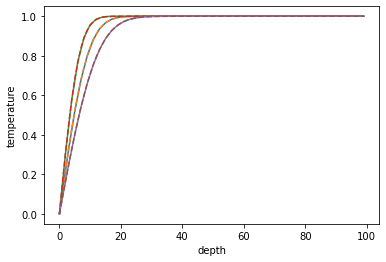

In [20]:
def T_ana(n):
    j = arange(nx)
    return T_ocean + (T_init - T_ocean)*erf(0.5*sqrt(j**2/(Fo*n)))


plot(T[50,:])
plot(T_ana(50), '--')
plot(T[25,:])
plot(T_ana(25), '--')
plot(T[90,:])
plot(T_ana(90), '--')
xlabel('depth')
ylabel('temperature')


Text(0, 0.5, 'temperature')

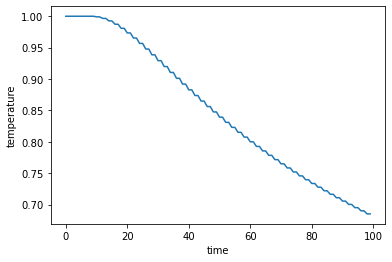

In [22]:
plot(T[:,10])
xlabel('time')
ylabel('temperature')